In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('vgsales.csv', delimiter=",", index_col=0)

In [3]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Diagrammes de répartition des données

In [26]:
numerical_df.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,
1,2006,41.49,29.02,3.77,8.46,82.74
2,1985,29.08,3.58,6.81,0.77,40.24
3,2008,15.85,12.88,3.79,3.31,35.82
4,2009,15.75,11.01,3.28,2.96,33.00
5,1996,11.27,8.89,10.22,1.00,31.37


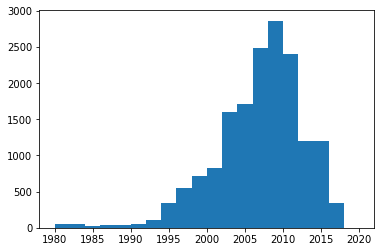

In [36]:
plt.hist(numerical_df.Year, linewidth=1.2,bins=20)
plt.show()

c:\users\gruel\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


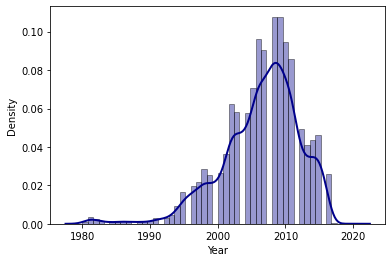

In [39]:
import seaborn as sns # Importer le module seaborn
sns.distplot(numerical_df.Year, hist=True, kde=True, 
             color = 'darkblue',hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.show()

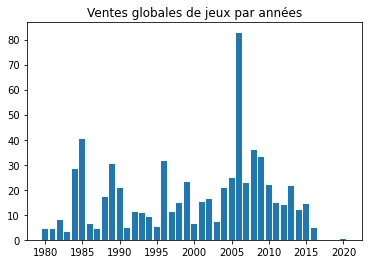

In [40]:
plt.bar(numerical_df.Year,numerical_df.Global_Sales)
plt.title("Ventes globales de jeux par années")
plt.show()

## Vérification du nombre de données

In [55]:
df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [54]:
colonnes_isolee = []
for colonne in df: 
    nbNaN = df[colonne].isna().sum()
    if (nbNaN / df.shape[0]) * 100 > 97:
        del df[colonne]
        colonnes_isolee['colonne'] = colonne

In [56]:
df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

## Nettoyage des données manquantes

In [43]:
df.isna().sum()

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [13]:
df.Year = df.Year.fillna(df.Year.mean())
df.Year = df.Year.astype('int32')
numerical_df = df.select_dtypes(('int', 'float'))

Rank
1        2006
2        1985
3        2008
4        2009
5        1996
         ... 
16596    2002
16597    2003
16598    2008
16599    2010
16600    2003
Name: Year, Length: 16598, dtype: int32

## Heatmap

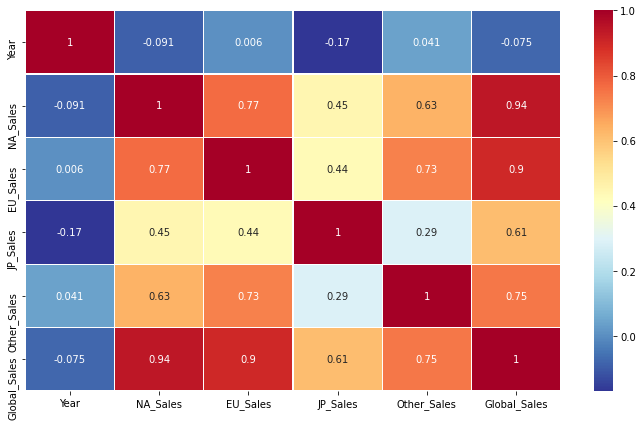

In [57]:
corr_ = df.corr()

plt.figure(figsize=(12, 7))

sns.heatmap(corr_, annot=True, linewidths=.2, cmap='RdYlBu_r')

plt.show()